<a href="https://colab.research.google.com/github/Rutuja0799/TSF-Tasks/blob/main/GRIP_Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Rutuja Jadhav**

#**Decision Tree Algorithm**

**Task3-Prediction Using Decision Tree Algorithm.**

**For the given dataset, create the Decision tree classifier and visualize it graphically.**

#Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Importing the dataset

In [2]:
Iris = pd.read_csv('Iris (1).csv')

In [3]:
Iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
Iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
Iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
X = Iris.drop(['Id','Species'],1)

In [7]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
y = Iris['Species']

In [9]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

#Encoding the dependent variable

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [11]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [12]:
y = pd.DataFrame(y)

In [13]:
y

,0
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


#correlation between the features

In [14]:
Corr = X.corr()

In [15]:
Corr

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


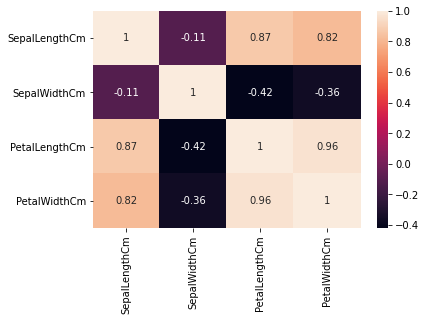

In [16]:
sns.heatmap(Corr,annot = True)

#Splitting the data into training and test set.

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

In [18]:
X_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
137,6.4,3.1,5.5,1.8
84,5.4,3.0,4.5,1.5
27,5.2,3.5,1.5,0.2
127,6.1,3.0,4.9,1.8
132,6.4,2.8,5.6,2.2
...,...,...,...,...
9,4.9,3.1,1.5,0.1
103,6.3,2.9,5.6,1.8
67,5.8,2.7,4.1,1.0
117,7.7,3.8,6.7,2.2


In [19]:
X_test

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
114,5.8,2.8,5.1,2.4
62,6.0,2.2,4.0,1.0
33,5.5,4.2,1.4,0.2
107,7.3,2.9,6.3,1.8
7,5.0,3.4,1.5,0.2
100,6.3,3.3,6.0,2.5
40,5.0,3.5,1.3,0.3
86,6.7,3.1,4.7,1.5
76,6.8,2.8,4.8,1.4
71,6.1,2.8,4.0,1.3


In [20]:
y_train

,0
137,2
84,1
27,0
127,2
132,2
...,...
9,0
103,2
67,1
117,2


In [21]:
y_test

,0
114,2
62,1
33,0
107,2
7,0
100,2
40,0
86,1
76,1
71,1


#Training the Decision tree on training set

In [22]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

#Visualising the Decision tree

In [23]:
plt.rcParams['figure.figsize'] = 20,20

[Text(558.0, 996.6, 'PetalWidthCm <= 0.8\ngini = 0.665\nsamples = 120\nvalue = [39, 37, 44]\nclass = Iris_Verginica'),
 Text(472.15384615384613, 815.4000000000001, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]\nclass = Iris_Setosa'),
 Text(643.8461538461538, 815.4000000000001, 'PetalWidthCm <= 1.75\ngini = 0.496\nsamples = 81\nvalue = [0, 37, 44]\nclass = Iris_Verginica'),
 Text(343.38461538461536, 634.2, 'PetalLengthCm <= 4.95\ngini = 0.18\nsamples = 40\nvalue = [0, 36, 4]\nclass = Iris_Versicolor'),
 Text(171.69230769230768, 453.0, 'PetalWidthCm <= 1.65\ngini = 0.056\nsamples = 35\nvalue = [0, 34, 1]\nclass = Iris_Versicolor'),
 Text(85.84615384615384, 271.79999999999995, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]\nclass = Iris_Versicolor'),
 Text(257.53846153846155, 271.79999999999995, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = Iris_Verginica'),
 Text(515.0769230769231, 453.0, 'PetalWidthCm <= 1.55\ngini = 0.48\nsamples = 5\nvalue = [0, 2, 3]\nclass = Iris_Verginica'),


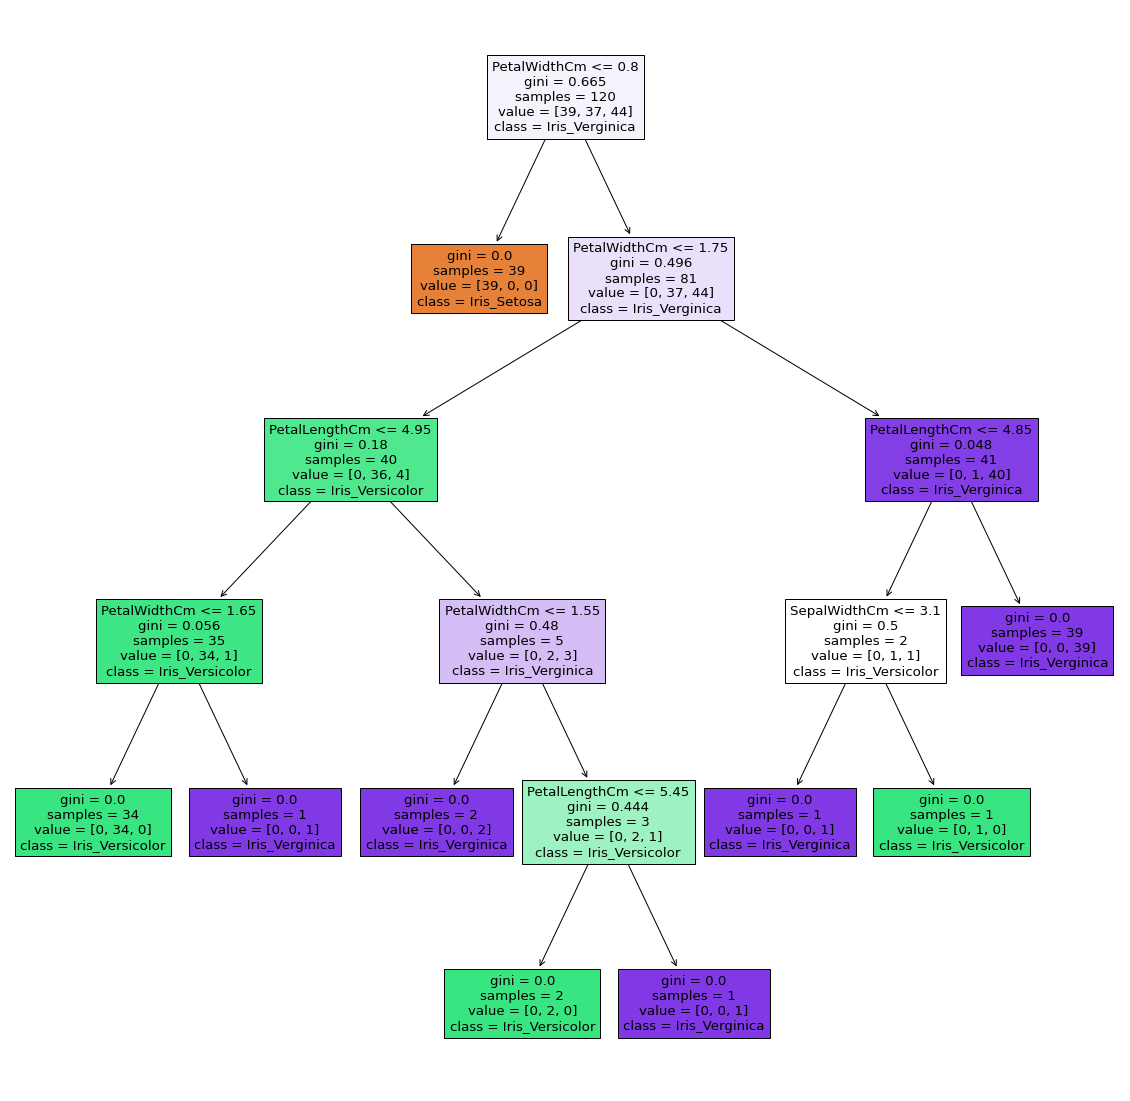

In [24]:
from sklearn import tree
tree.plot_tree(decision_tree = classifier,filled = True,feature_names = X.columns,class_names=['Iris_Setosa','Iris_Versicolor','Iris_Verginica'])

#Testing the performance of decision tree on the training set

In [25]:
y_pred_train =classifier.predict(X_train)

In [26]:
y_pred_train

array([2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0, 0, 1, 2, 2, 2, 2, 1, 2,
       1, 1, 2, 2, 2, 2, 1, 2, 1, 0, 2, 1, 1, 1, 1, 2, 0, 0, 2, 1, 0, 0,
       1, 0, 2, 1, 0, 1, 2, 1, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2,
       0, 0, 2, 0, 0, 0, 1, 2, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 2, 1, 2, 1,
       0, 2, 0, 2, 0, 0, 2, 0, 2, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 0, 1,
       1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

In [27]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_train,y_pred_train)

In [28]:
cm

array([[39,  0,  0],
       [ 0, 37,  0],
       [ 0,  0, 44]])

In [29]:
accuracy_score(y_train,y_pred_train)

1.0

**we can see all the training set values are classified 
correctly,this is because our Decision tree is trained
on the training set.
The actual performance of decision tree can be found out after
testing the tree on test set**

#Testing the performance of Decision tree on test set

In [30]:
y_pred_test = classifier.predict(X_test)

In [31]:
y_pred_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [32]:
confusion_matrix(y_test,y_pred_test)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]])

In [33]:
accuracy_score(y_test,y_pred_test)

1.0

**we can see that decision tree performed very well on both the sets,
 training as well as on the test set.**

#**we can use this decision tree to predict the class of new features.**